In [1]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


# **Creating plaintext and ciphers**

In [3]:
import numpy as np
from CipherUtils import CipherGenerator, TextEncoder, TextPreProcessor
import nltk
nltk.download('abc')
# nltk.download('genesis')
# nltk.download('inaugural')
# nltk.download('state_union')
# nltk.download('webtext')
# nltk.download('brown')

abc_words = ' '.join(nltk.corpus.abc.words())
# genesis_words = ' '.join(nltk.corpus.genesis.words())
# inaugral_words = ' '.join(nltk.corpus.inaugural.words())
# state_union_words = ' '.join(nltk.corpus.state_union.words())
# webtext_words = ' '.join(nltk.corpus.webtext.words())
# brown_words = ' '.join(nltk.corpus.brown.words())

# List of text file paths to build our corpus (where we learn the transitions probs)
texts = [
    abc_words,
    # genesis_words,
    # inaugral_words,
    # state_union_words,
    # webtext_words,
    # brown_words,
]
corpus = ''.join(texts)


coded_text = []
plain_text = []
word_count = 0
preprocessor = TextPreProcessor()

cipher_generator = CipherGenerator()
cipher = cipher_generator.generate_cipher()
encoder = TextEncoder()

for sentence in corpus.split('.'):
    sentence = preprocessor.lower(text=sentence)
    sentence = preprocessor.remove_unknown_chars(
        text=sentence, unknown_chars=preprocessor.unknown_chars(sentence)
    )
    sentence = preprocessor.remove_additional_spaces(text=sentence)
    plain_text.append(sentence)

    encrypted_text = encoder.encode_text(sentence, cipher=cipher)
    coded_text.append(encrypted_text)

print(f'Plain Text: \n{plain_text[:5]}\n')
print(f'Cipher Text: \n{coded_text[:5]}\n')

[nltk_data] Downloading package abc to /usr/share/nltk_data...
[nltk_data]   Package abc is already up-to-date!
Plain Text: 
['pm denies knowledge of awb kickbacks the prime minister has denied he knew awb was paying kickbacks to iraq despite writing to the wheat exporter asking to be kept fully informed on iraq wheat sales', 'letters from john howard and deputy prime minister mark vaile to awb have been released by the cole inquiry into the oil for food program', 'in one of the letters mr howard asks awb managing director andrew lindberg to remain in close contact with the government on iraq wheat sales', 'the opposition s gavan o connor says the letter was sent in the same time awb was paying kickbacks to iraq though a jordanian trucking company', 'he says the government can longer wipe its hands of the illicit payments which totalled million']

Cipher Text: 
['ox cnpkna ipsfhncyn sz ufm ikrimuria vtn ogkxn xkpkavng tua cnpknc tn ipnf ufm fua ouqkpy ikrimuria vs kguw cnaokvn fgkvkpy 

In [4]:
# print(corpus[29813:31000])

In [5]:
print(f"Length of Plain Texts: {len(plain_text)}")
print(f"Length of Cipher Texts: {len(coded_text)}")

Length of Plain Texts: 29814
Length of Cipher Texts: 29814


In [6]:
max([len(sentence) for sentence in coded_text])

774

# **Preprocessing Data**

In [7]:
from keras_preprocessing.text import Tokenizer


def tokenize(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    
    tf.keras.preprocessing.text.Tokenizer(num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=" ",
    char_level=False,
    oov_token=None,
    document_count=0,
    **kwargs
    )
    """
    # TODO: Implement
    x_tk = Tokenizer(char_level=True)
    x_tk.fit_on_texts(x)                 # because input is text, not sequence (list of integer tokens)

    return x_tk.texts_to_sequences(x), x_tk

# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

{' ': 1, 'e': 2, 'o': 3, 't': 4, 'i': 5, 's': 6, 'h': 7, 'r': 8, 'y': 9, 'u': 10, 'c': 11, 'n': 12, 'a': 13, 'p': 14, '.': 15, 'q': 16, 'k': 17, 'b': 18, 'w': 19, 'f': 20, 'x': 21, 'j': 22, 'm': 23, 'v': 24, 'l': 25, 'z': 26, 'd': 27, 'g': 28, ',': 29}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [4, 7, 2, 1, 16, 10, 5, 11, 17, 1, 18, 8, 3, 19, 12, 1, 20, 3, 21, 1, 22, 10, 23, 14, 6, 1, 3, 24, 2, 8, 1, 4, 7, 2, 1, 25, 13, 26, 9, 1, 27, 3, 28, 1, 15]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [18, 9, 1, 22, 3, 24, 2, 1, 29, 1, 23, 9, 1, 16, 10, 5, 11, 17, 1, 6, 4, 10, 27, 9, 1, 3, 20, 1, 25, 2, 21, 5, 11, 3, 28, 8, 13, 14, 7, 9, 1, 19, 3, 12, 1, 13, 1, 14, 8, 5, 26, 2, 1, 15]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [4, 7, 5, 6, 1, 5, 6, 1, 13, 1, 6, 7, 3, 8, 4, 1, 6, 2, 12, 4, 2, 12, 11, 2, 1, 15]


# **Padding**

In [8]:
import numpy as np
from keras_preprocessing.sequence import pad_sequences


def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    
    tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre',
    value=0.0)
    """
    # TODO: Implement
    # Find the length of the longest string in the dataset.
    if length is None:
        length = max([len(sentence) for sentence in x])
    # Then, pass it to pad_sentences as the maxlen parameter
    
    return pad_sequences(x, maxlen=length, padding="post", truncating="post",)

# Pad Tokenized output
test_pad = pad(text_tokenized)
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

Sequence 1 in x
  Input:  [ 4  7  2  1 16 10  5 11 17  1 18  8  3 19 12  1 20  3 21  1 22 10 23 14
  6  1  3 24  2  8  1  4  7  2  1 25 13 26  9  1 27  3 28  1 15]
  Output: [ 4  7  2  1 16 10  5 11 17  1 18  8  3 19 12  1 20  3 21  1 22 10 23 14
  6  1  3 24  2  8  1  4  7  2  1 25 13 26  9  1 27  3 28  1 15  0  0  0
  0  0  0  0  0  0]
Sequence 2 in x
  Input:  [18  9  1 22  3 24  2  1 29  1 23  9  1 16 10  5 11 17  1  6  4 10 27  9
  1  3 20  1 25  2 21  5 11  3 28  8 13 14  7  9  1 19  3 12  1 13  1 14
  8  5 26  2  1 15]
  Output: [18  9  1 22  3 24  2  1 29  1 23  9  1 16 10  5 11 17  1  6  4 10 27  9
  1  3 20  1 25  2 21  5 11  3 28  8 13 14  7  9  1 19  3 12  1 13  1 14
  8  5 26  2  1 15]
Sequence 3 in x
  Input:  [ 4  7  5  6  1  5  6  1 13  1  6  7  3  8  4  1  6  2 12  4  2 12 11  2
  1 15]
  Output: [ 4  7  5  6  1  5  6  1 13  1  6  7  3  8  4  1  6  2 12  4  2 12 11  2
  1 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


# **Pipeline Processing**

In [9]:
def preprocess(x, y):
    """
    Preprocess x and y
    :param x: Feature List of sentences
    :param y: Label List of sentences
    :return: Tuple of (Preprocessed x, Preprocessed y, x tokenizer, y tokenizer)
    """
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)

    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    # Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    return preprocess_x, preprocess_y, x_tk, y_tk

preproc_code_sentences, preproc_plaintext_sentences, code_tokenizer, plaintext_tokenizer =\
    preprocess(coded_text, plain_text)

print('Data Preprocessed')

Data Preprocessed


In [10]:
preproc_code_sentences[0]

array([18, 15,  1, 12,  2,  8,  7,  2,  5,  1, 23,  8,  6, 20, 11,  2, 12,
       17,  2,  1,  6, 16,  1,  4, 20, 21,  1, 23,  7, 13, 23, 21,  4, 13,
       23,  5,  1,  3, 10,  2,  1, 18,  9,  7, 15,  2,  1, 15,  7,  8,  7,
        5,  3,  2,  9,  1, 10,  4,  5,  1, 12,  2,  8,  7,  2, 12,  1, 10,
        2,  1, 23,  8,  2, 20,  1,  4, 20, 21,  1, 20,  4,  5,  1, 18,  4,
       19,  7,  8, 17,  1, 23,  7, 13, 23, 21,  4, 13, 23,  5,  1,  3,  6,
        1,  7,  9,  4, 26,  1, 12,  2,  5, 18,  7,  3,  2,  1, 20,  9,  7,
        3,  7,  8, 17,  1,  3,  6,  1,  3, 10,  2,  1, 20, 10,  2,  4,  3,
        1,  2, 24, 18,  6,  9,  3,  2,  9,  1,  4,  5, 23,  7,  8, 17,  1,
        3,  6,  1, 21,  2,  1, 23,  2, 18,  3,  1, 16, 14, 11, 11, 19,  1,
        7,  8, 16,  6,  9, 15,  2, 12,  1,  6,  8,  1,  7,  9,  4, 26,  1,
       20, 10,  2,  4,  3,  1,  5,  4, 11,  2,  5,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [11]:
len(code_tokenizer.word_index)+1  # +1 for 0?

28

In [12]:
len(plaintext_tokenizer.word_index)+1

28

In [13]:
plaintext_tokenizer.word_index

{' ': 1,
 'e': 2,
 't': 3,
 'a': 4,
 's': 5,
 'o': 6,
 'i': 7,
 'n': 8,
 'r': 9,
 'h': 10,
 'l': 11,
 'd': 12,
 'c': 13,
 'u': 14,
 'm': 15,
 'f': 16,
 'g': 17,
 'p': 18,
 'y': 19,
 'w': 20,
 'b': 21,
 'v': 22,
 'k': 23,
 'x': 24,
 'j': 25,
 'q': 26,
 'z': 27}

In [14]:
preproc_code_sentences.shape

(29814, 774)

In [15]:
preproc_plaintext_sentences.shape

(29814, 774, 1)

# **MODEL**

In [16]:
from keras.layers import GRU, Input, Dense, TimeDistributed, RNN, LSTM
from keras.models import Model, Sequential
from keras.layers import Activation
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
import tensorflow


def simple_model(input_shape, output_sequence_length, code_vocab_size, plaintext_vocab_size):
    """
    Build and train a basic RNN on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param code_vocab_size: Number of unique code characters in the dataset
    :param plaintext_vocab_size: Number of unique plaintext characters in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Build the model
    
    x = Input(shape=input_shape[1:])   # shape(none,101,1) ie 
    
    seq = LSTM(units= 64, return_sequences = True, activation="tanh", name='Layer1')(x)  # output must be batchsize x timesteps x units
    
    output = TimeDistributed(Dense(units = plaintext_vocab_size, activation='softmax', name='Layer2'))(seq)
    
    model = Model(inputs = x, outputs = output)
    
    model.compile(optimizer='adam', loss= sparse_categorical_crossentropy, metrics=['accuracy'])
    
    model.summary()
    
    return model


# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_code_sentences, preproc_plaintext_sentences.shape[1]) # pad code sequences with maxlen 54: shape=10001x54
tmp_x = tmp_x.reshape((-1, preproc_plaintext_sentences.shape[-2], 1))     # reshape padded code seq in 10001 x 54 x 1

In [17]:
tmp_x.shape

(29814, 774, 1)

In [18]:
# Train the neural network
simple_lstm_model = simple_model(
    tmp_x.shape,
    preproc_plaintext_sentences.shape[1],
    len(code_tokenizer.word_index)+1,
    len(plaintext_tokenizer.word_index)+1)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 774, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer1 (LSTM)                   │ (None, 774, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 774, 28)        │         1,820 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,716 (73.11 KB)

 Trainable params: 18,716 (73.11 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
simple_lstm_model.get_layer(name="Layer1").output.shape

(None, 774, 64)

In [20]:
preproc_plaintext_sentences.shape

(29814, 774, 1)

In [21]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
# simple_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = simple_lstm_model.fit(tmp_x, 
                      preproc_plaintext_sentences, 
                      batch_size=32, 
                      epochs=100, 
                      validation_split=0.2, 
                      callbacks=[early_stopping]
                     )

Epoch 1/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 146s 147ms/step - accuracy: 0.8709 - loss: 0.7425 - val_accuracy: 0.9433 - val_loss: 0.2106
Epoch 2/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 104s 139ms/step - accuracy: 0.9537 - loss: 0.1832 - val_accuracy: 0.9741 - val_loss: 0.1171
Epoch 3/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 105s 141ms/step - accuracy: 0.9783 - loss: 0.1040 - val_accuracy: 0.9855 - val_loss: 0.0732
Epoch 4/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 105s 141ms/step - accuracy: 0.9869 - loss: 0.0668 - val_accuracy: 0.9900 - val_loss: 0.0503
Epoch 5/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 104s 140ms/step - accuracy: 0.9908 - loss: 0.0469 - val_accuracy: 0.9925 - val_loss: 0.0372
Epoch 6/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 105s 140ms/step - accuracy: 0.9933 - loss: 0.0349 - val_accuracy: 0.9943 - val_loss: 0.0288
Epoch 7/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 105s 141ms/step - accuracy: 0.9947 - loss: 0.0275 - val_accuracy: 0.9957 - val_loss: 0.0229
Epoch 8/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 105s 141ms/step - accuracy: 

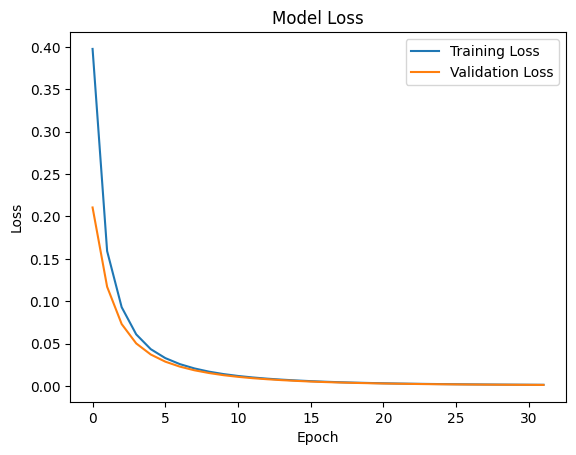

In [23]:
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [24]:
def logits_to_text(logits, tokenizer):
    """
    Turn logits from a neural network into text using the tokenizer
    :param logits: Logits from a neural network
    :param tokenizer: Keras Tokenizer fit on the labels
    :return: String that represents the text of the logits
    """
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

print('`logits_to_text` function loaded.')

print(logits_to_text(simple_lstm_model.predict(tmp_x[:1])[0], plaintext_tokenizer))

`logits_to_text` function loaded.
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
w u   d e n i e s   k n o w l e d g e   o f   a w b   k i c k b a c k s   t h e   p r i m e   m i n i s t e r   h a s   d e n i e d   h e   k n e w   a w b   w a s   p a y i n g   k i c k b a c k s   t o   i r a q   d e s p i t e   w r i t i n g   t o   t h e   w h e a t   e x p o r t e r   a s k i n g   t o   b e   k e p t   f u l l y   i n f o r m e d   o n   i r a q   w h e a t   s a l e s <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

In [25]:
plain_text[0]

'pm denies knowledge of awb kickbacks the prime minister has denied he knew awb was paying kickbacks to iraq despite writing to the wheat exporter asking to be kept fully informed on iraq wheat sales'

In [26]:
def encrypt_test_text(plain_text_test):
    plain_text_test = preprocessor.lower(text=plain_text_test)
    plain_text_test = preprocessor.remove_unknown_chars(
        text=plain_text_test, unknown_chars=preprocessor.unknown_chars(plain_text_test)
    )
    plain_text_test = preprocessor.remove_additional_spaces(text=plain_text_test)
    
    
    encrypted_text_test = encoder.encode_text(plain_text_test, cipher=cipher)

    
    print(f"Plain Text: {plain_text_test}")
    print(f"Coded Text: {encrypted_text_test}")
    
    return encrypted_text_test

In [27]:
def test_model(encrypted_text_test):
    

    encrypted_test_token = code_tokenizer.texts_to_sequences([encrypted_text_test])
    # encrypted_test_token = pad(encrypted_test_token)
    # print(f"\n\nCoded Text Token: \n{encrypted_test_token}")
    
    
    test_x = pad(encrypted_test_token, preproc_plaintext_sentences.shape[1])
    test_x_reshaped = test_x.reshape((-1, preproc_plaintext_sentences.shape[-2], 1))
    plain_prediction = simple_lstm_model.predict(test_x_reshaped)
    
    
    predict_array = np.argmax(plain_prediction[0],1)
    
    prediction_result = logits_to_text(plain_prediction[0], plaintext_tokenizer)
    print(f"Predicted Text: {prediction_result}")
    
    
    correct_chars = sum(1 for a, b in zip(test_x[0], predict_array) if a == b)
    total_chars = len(test_x[0])
    accuracy = correct_chars / total_chars
    
    print(f"\n\nAccuracy: {accuracy*100:.2f}")


    

In [28]:
encrypted_text = encrypt_test_text('the quick sly fox jumped over a lazy brown dog.')
test_model(encrypted_text)

Plain Text: the quick sly fox jumped over a lazy brown dog
Coded Text: vtn wdkri ahq zsj bdxonc slng u hueq mgsfp csy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Text: t h e   q u i c k   s l y   f o x   j u m p e d   o v e r   a   l a z y   b r o w n   d o g <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

In [29]:
encrypted_text = encrypt_test_text('This is an NLP Project')
test_model(encrypted_text)

Plain Text: this is an nlp project
Coded Text: vtka ka up pho ogsbnrv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Text: t h i s   i s   a n   n l p   p r o j e c t <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

In [30]:
encrypted_text = encrypt_test_text('This project decrypts substitution cipher')
test_model(encrypted_text)

Plain Text: this project decrypts substitution cipher
Coded Text: vtka ogsbnrv cnrgqova admavkvdvksp rkotng
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Text: t h i s   p r o j e c t   d e c r y p t s   s u b s t i t u t i o n   c i p h e r <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

In [31]:
encrypted_text = encrypt_test_text('It had good accuracy')
test_model(encrypted_text)

Plain Text: it had good accuracy
Coded Text: kv tuc yssc urrdgurq
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Text: i t   h a d   g o o d   a c c u r a c y <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

In [32]:
encrypted_text = encrypt_test_text('let\'s test the number')
test_model(encrypted_text)

Plain Text: let s test the number
Coded Text: hnv a vnav vtn pdxmng
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Text: h e t   s   t e s t   t h e   n u m b e r <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <P

In [33]:
encrypted_text = encrypt_test_text('It cannot encode and decode 1234')
test_model(encrypted_text)

Plain Text: it cannot encode and decode
Coded Text: kv ruppsv nprscn upc cnrscn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Text: i t   c a n n o t   e n c o d e   a n d   d e c o d e <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <P

In [34]:
encrypted_text = encrypt_test_text('Because It does not have numbers in it\'s vocab')
test_model(encrypted_text)

Plain Text: because it does not have numbers in it s vocab
Coded Text: mnrudan kv csna psv tuln pdxmnga kp kv a lsrum
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Text: b e c a u s e   i t   d o e s   n o t   h a v e   n u m b e r s   i n   i t   s   v o c a b <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

In [35]:
encrypted_text = encrypt_test_text('It also removes "\'" appostrophy')
test_model(encrypted_text)

Plain Text: it also removes appostrophy
Coded Text: kv uhas gnxslna uoosavgsotq
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Text: i t   a l s o   r e m o v e s   a p p o s t r o p h y <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <P